In [2]:
from IPython.display import display, Image # Displays things nicely
import pandas as pd # Key tool 
import matplotlib.pyplot as plt # Helps plot
import numpy as np # Numerical operations

import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona

In [3]:
path = "C:\\data_bootcamp\\data_bootcamp_spring_2018\\week13\\shape_files\\NYC"

regions_shape = path + "\\ZIP_CODE_040114.shx"

In [4]:
nyc_map = gpd.read_file(regions_shape)

In [5]:
type(nyc_map)

geopandas.geodataframe.GeoDataFrame

In [6]:
nyc_map.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


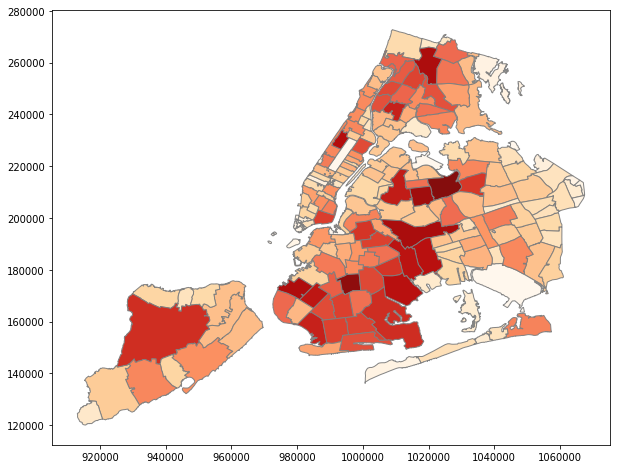

In [14]:
fig, ax = plt.subplots(figsize = (10,8))

# First create the map for the urban share

nyc_map.plot(ax = ax, edgecolor='tab:grey', column='POPULATION', cmap='OrRd', alpha = 0.95)

plt.show()

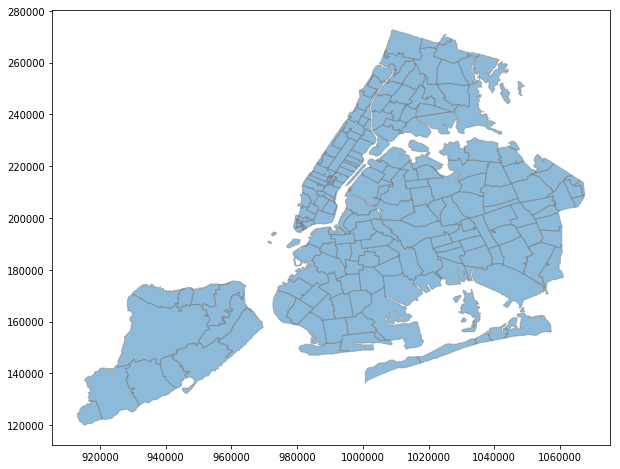

In [16]:
fig, ax = plt.subplots(figsize = (10,8))

# First create the map for the urban share

nyc_map.plot(ax = ax, edgecolor='tab:grey', alpha = 0.5)

plt.show()